### ⚠️ Always run this cell at the beginning ⚠️

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import spec2nexus.spec
import re
from functions import *

# Export from Spec (2024/07/24)

In [2]:
file_path = "2024-07-23_001_Cu-6Sm_Pristine_RT_2024_07_24_1448.spec"
spec_contents = read_esrf_spec_file(file_path)

### Select the scans you want to export

In [3]:
# use the Sample name and the Condition
folder_name = "S1_Cu_6Sm/001_Cu-6Sm_Pristine_RT/"

# list the scan numbers of the files you wan to export (and the corresponding edge type)
scan_number_to_save_list = [80, 81,82,83,84,85]
suffix = "Ce_L3_NEXAFS"

for scan_number_to_save in scan_number_to_save_list:
    if scan_number_to_save in spec_contents:
        save_path = folder_name + f'scan_{scan_number_to_save}'+ f'_{suffix}.dat'
        save_scan_to_ascii(spec_contents[scan_number_to_save], save_path)
        print(f"Scan {scan_number_to_save} saved to {save_path}")
    else:
        print(f"Scan number {scan_number_to_save} not found in the file.")

Scan 80 saved to S1_Cu_6Sm/001_Cu-6Sm_Pristine_RT/scan_80_Ce_L3_NEXAFS.dat
Scan 81 saved to S1_Cu_6Sm/001_Cu-6Sm_Pristine_RT/scan_81_Ce_L3_NEXAFS.dat
Scan 82 saved to S1_Cu_6Sm/001_Cu-6Sm_Pristine_RT/scan_82_Ce_L3_NEXAFS.dat
Scan 83 saved to S1_Cu_6Sm/001_Cu-6Sm_Pristine_RT/scan_83_Ce_L3_NEXAFS.dat
Scan 84 saved to S1_Cu_6Sm/001_Cu-6Sm_Pristine_RT/scan_84_Ce_L3_NEXAFS.dat
Scan 85 saved to S1_Cu_6Sm/001_Cu-6Sm_Pristine_RT/scan_85_Ce_L3_NEXAFS.dat


### Merge all the scans around the same edge and condition

In [4]:
folder_path = "S1_Cu_6Sm/001_Cu-6Sm_Pristine_RT/"

pattern = r'scan_(\d+)_.*\.dat'
files = find_files_with_consecutive_numbers(folder_path, pattern)
full_paths = [os.path.join(folder_path, file) for file in files]

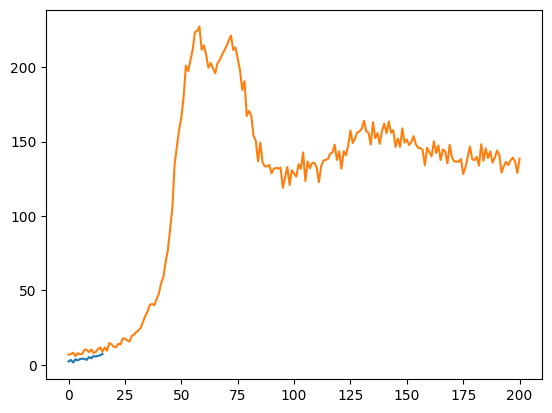

In [17]:
def load_df(file_path):
    try:
        df = pd.read_csv(file_path, comment='#', delimiter='\t')
        if 'monoE' in df.columns and not df['monoE'].empty:
            return df  # Return the starting value
        else:
            return None
    except Exception as e:
        print(f"Error reading file {file_path}: {e}")
        return None

grouped_files = group_files_by_start(full_paths)

signal_average_files = dict()
for file_list in grouped_files:
    signal_average = 0
    for file in grouped_files[file_list]:
        df=load_df(file)
        df['roi1_over_mcaLt'] = df['roi1'] / df['mcaLt']
        signal_average += df['roi1_over_mcaLt']
        #df.plot(x="monoE", y="roi1_over_mcaLt")
    signal_average_files[file_list] = signal_average/len(grouped_files[file_list])
for key in signal_average_files:
    plt.plot(signal_average_files[key])
